In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, fbeta_score

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/german_credit_data_with_target.csv')

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Unique Value Analysis

In [ ]:
for i in list(data.columns):
  print("{} -- {}" .format(i, data[i].value_counts().shape[0]))

Age -- 53
Sex -- 2
Job -- 4
Housing -- 3
Saving accounts -- 4
Checking account -- 3
Credit amount -- 921
Duration -- 33
Purpose -- 8
Risk -- 2


# Categoric Feature Analysis & Visualization

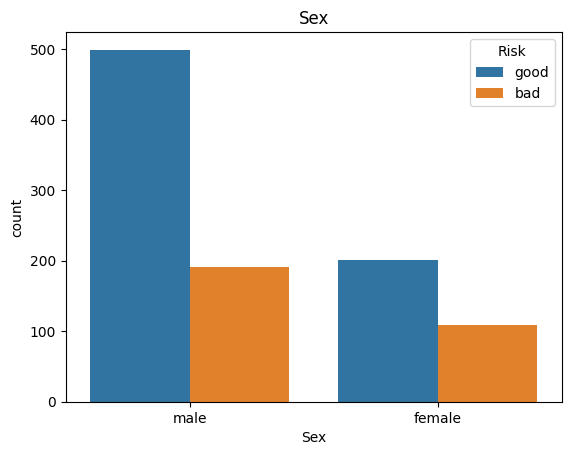

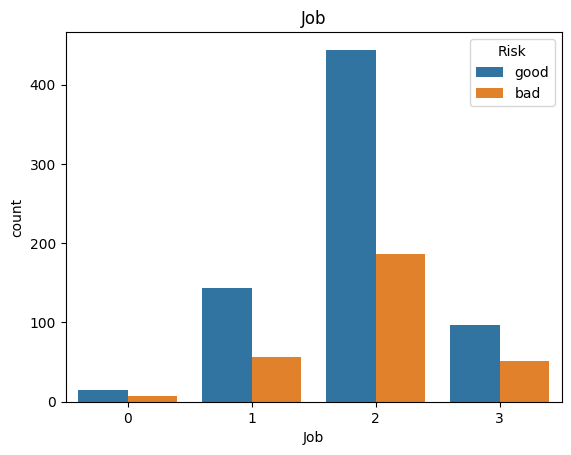

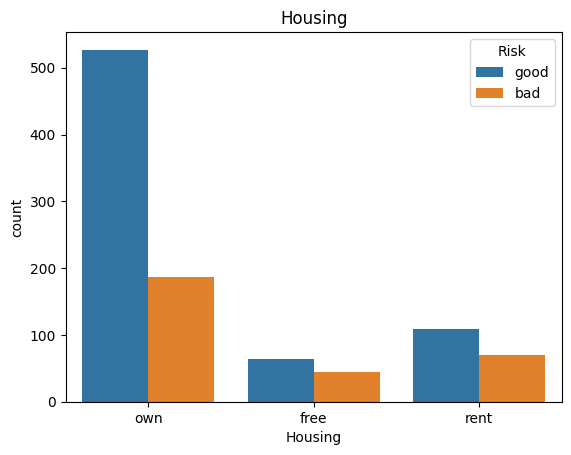

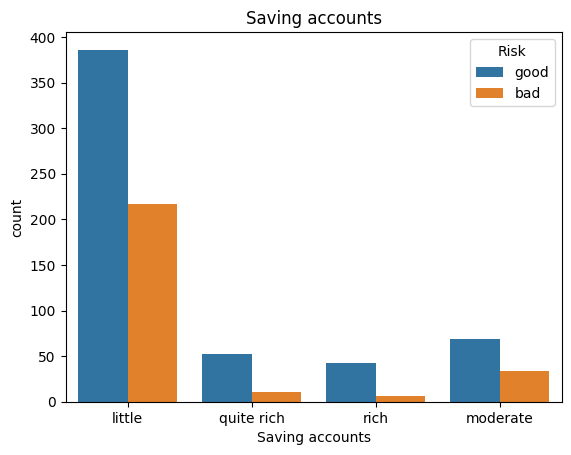

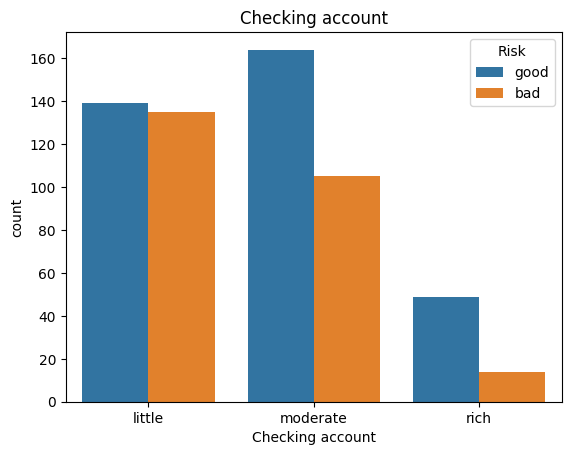

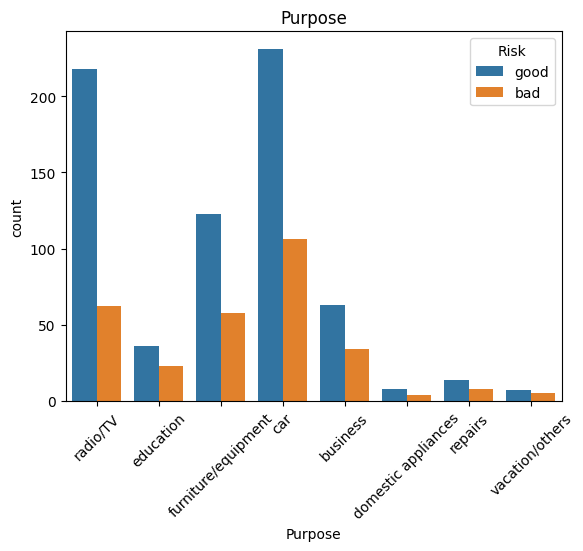

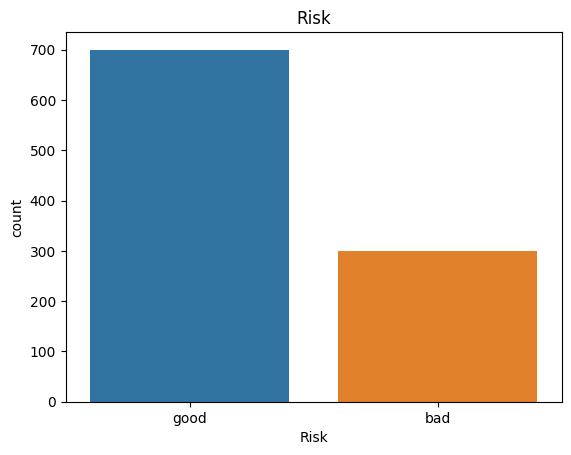

In [ ]:
categoric_vars_list = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

data_categoric = data.loc[:, categoric_vars_list]
for i in categoric_vars_list:
  plt.figure()
  sns.countplot(x = i, data = data_categoric, hue = "Risk")
  plt.title(i)
  if i=="Purpose":
    plt.xticks(rotation = 45)

# Numeric Feature Analysis & Visualization

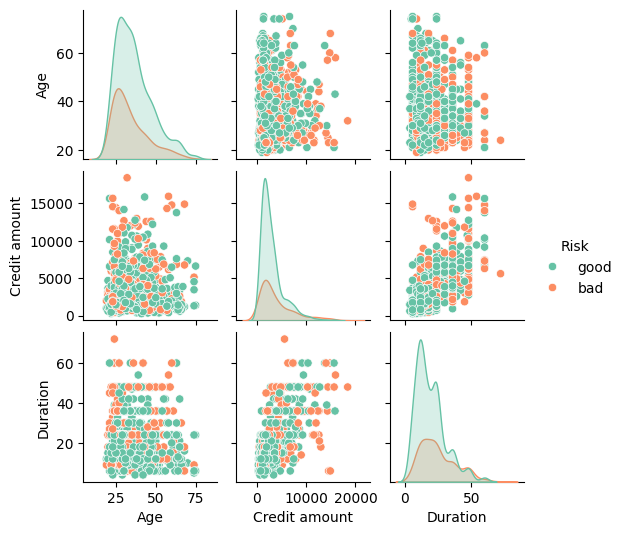

In [ ]:
numeric_vars_list = ['Age', 'Credit amount', 'Duration', 'Risk']

data_numeric = data.loc[:, numeric_vars_list]
sns.pairplot(data_numeric, hue = "Risk", diag_kind="kde", palette = "Set2", height = 1.8)
plt.show()


# Missing Values Analysis

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


# Categoric Features' One-Hot Encoding

In [ ]:
df = data.copy()
df = pd.get_dummies(df, columns = categoric_vars_list[:-1], drop_first=True)
df.columns

Index(['Age', 'Credit amount', 'Duration', 'Risk', 'Sex_male', 'Job_1',
       'Job_2', 'Job_3', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

In [ ]:
df.head()

,Age,Credit amount,Duration,Risk,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,good,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,22,5951,48,bad,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,49,2096,12,good,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,45,7882,42,good,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,53,4870,24,bad,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# Numeric Features Scaling

In [ ]:
scaler = StandardScaler()
df[numeric_vars_list[:-1]] = scaler.fit_transform(df[numeric_vars_list[:-1]])
df.head()

,Age,Credit amount,Duration,Risk,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,-0.745131,-1.236478,good,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,-1.191404,0.949817,2.248194,bad,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,1.183312,-0.416562,-0.738668,good,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.831502,1.634247,1.750384,good,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,1.535122,0.566664,0.256953,bad,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# Outlier Detection -- For "Numeric Columns"

In [ ]:
numeric_vars_list = ['Age', 'Credit amount', 'Duration']
df_numeric = df.loc[:, numeric_vars_list]
df_numeric.head()

,Age,Credit amount,Duration
0,2.766456,-0.745131,-1.236478
1,-1.191404,0.949817,2.248194
2,1.183312,-0.416562,-0.738668
3,0.831502,1.634247,1.750384
4,1.535122,0.566664,0.256953


<Axes: >

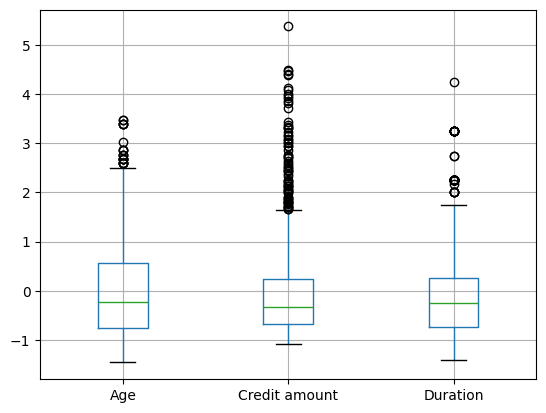

In [ ]:
df_numeric.boxplot()

In [ ]:
df.describe()

,Age,Credit amount,Duration
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.329071e-17,6.661338e-17,1.136868e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.455261e+00,-1.070865e+00,-1.402415e+00
25%,-7.516417e-01,-6.754833e-01,-7.386675e-01
50%,-2.239269e-01,-3.373443e-01,-2.408572e-01
75%,5.676451e-01,2.484620e-01,2.569531e-01
max,3.470076e+00,5.370789e+00,4.239436e+00


In [ ]:
for i in numeric_vars_list:

  #Calculating the Inter Quartile Range
  Q1 = np.percentile(df.loc[:,i], 25)
  Q3 = np.percentile(df.loc[:,i], 75)
  IQR = Q3 - Q1

  #Defining Bounds
  lower_bound = Q1 - (2.5*IQR)
  upper_bound = Q3 - (2.5*IQR)

  print(f"\n Processing Feature: {i}")
  print(f" Old Shape: {df.loc[:,i].shape}")

  #Replace Outliers
  df.loc[df[i] < lower_bound, i] = lower_bound
  df.loc[df[i] > upper_bound, i] = upper_bound

  print(f"FEATURE '{i}' PROCESSED.  Outliers replaced with bounds.")

print("\n Outlier Replacement Complete!!")


 Processing Feature: Age
 Old Shape: (1000,)
FEATURE 'Age' PROCESSED.  Outliers replaced with bounds.

 Processing Feature: Credit amount
 Old Shape: (1000,)
FEATURE 'Credit amount' PROCESSED.  Outliers replaced with bounds.

 Processing Feature: Duration
 Old Shape: (1000,)
FEATURE 'Duration' PROCESSED.  Outliers replaced with bounds.

 Outlier Replacement Complete!!


In [ ]:
df.head()

,Age,Credit amount,Duration,Risk,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,-2.730572,-2.061401,-2.232098,good,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,-2.730572,-2.061401,-2.232098,bad,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,-2.730572,-2.061401,-2.232098,good,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,-2.730572,-2.061401,-2.232098,good,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,-2.730572,-2.061401,-2.232098,bad,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# Correlation between Features

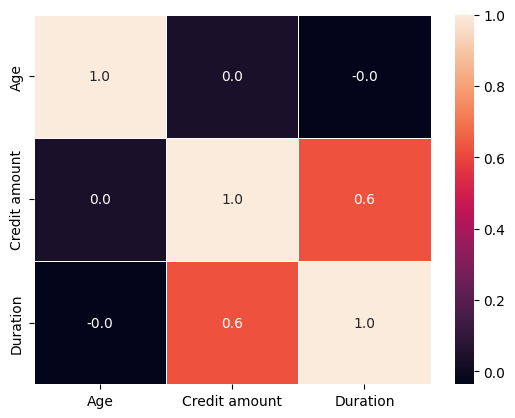

In [ ]:
plt.figure(figure = (14,10))
sns.heatmap(df_numeric.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

# Data Split

In [ ]:
df['y'] = df['Risk'].apply(lambda x: 0 if x=='good' else 1)
y = df['y']
df.drop(['Risk'], axis = 1, inplace = True)
df.drop(['y'], axis = 1, inplace = True)

x = df

#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

# ROC - Curve Function

In [ ]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc: .2f})')
  plt.plot([0,1], [0,1], color = 'green', lw = 2, linestyle = '--')
  plt.xlabel ('Fale Positive Rate')
  plt.ylabel('False Negative Rate')
  plt.title('ROC Curve')
  plt.legend(loc = 'lower right')

# **CLASSIFICATION -- Model Iteration**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Bes Hyperparameters: {'C': 1, 'penalty': 'l1'}
Logistic Regression: 0.70


[[202   7]
 [ 83   8]]


Fbeta Score: 0.106
Classification Report: Logistic Regression

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       209
           1       0.53      0.09      0.15        91

    accuracy                           0.70       300
   macro avg       0.62      0.53      0.48       300
weighted avg       0.66      0.70      0.62       300



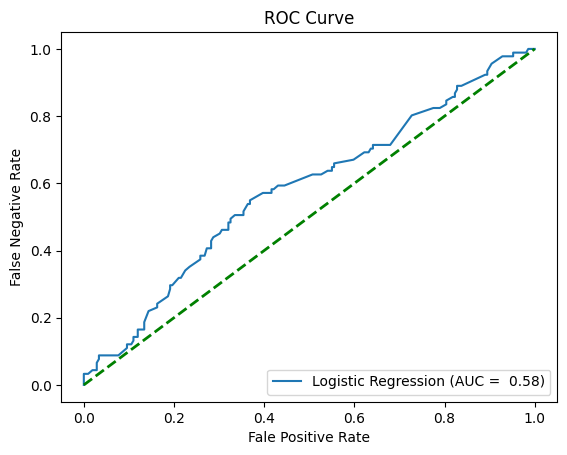

In [ ]:
## LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', random_state= 42)

#hyperparameter tuning using grid-search
param_grid = {
            'C': [0.01, 0.1, 1, 1.5, 2, 3, 4, 5, 10, 100],
      'penalty': ['l1', 'l2']
            }
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid, scoring = 'roc_auc', cv = 5, verbose = 1, n_jobs = -1)
grid_search.fit(x_train, y_train)
print("Bes Hyperparameters:", grid_search.best_params_)

#PREDICTION--ROC Curve
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression: {accuracy:.2f}")
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(f"Fbeta Score: {fbeta_score(y_test, y_pred, beta=2):.3f}")

plot_roc_curve(y_test, y_pred_prob, "Logistic Regression")
print("Classification Report: Logistic Regression\n")
print(classification_report(y_test, y_pred))